<a href="https://colab.research.google.com/github/Shwethaa-R/Deep-Learning-Activity-3/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing CNN with customized layers

Write a program to implement the new CNN model. The model should contains following
things : (Note : use any grayscale dataset with the 10 classes)

1. Convolution: Input:32x32x1. Output:28x28x6
2. SubSampling: Input:28x28x6. Output: 14x14x6
3. Convolution: Input:14x14x1. Output:10x10x16
4. SubSampling: Input:10x10x16. Output:5x5x16
5. Fully Connected: Input:5x5x16. Output:120
6. Fully Connected: Input:120. Output:84
7. Output:10

In [1]:
import numpy as np
from PIL import Image
import os
from keras import layers
from keras.layers import Dense, Activation, Flatten, Conv2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
# MNIST Handwritten Digits Dataset is taken for the exersise. The dataset contains images of 10 classes, each image having a size of 32x32
# mounting Google Drive to upload the dataset
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/My Drive/Classification Dataset'
path_train = path + '/train'
path_test = path + '/test'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path_train, target_size=(32,32), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(32,32), class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [4]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 32, 32, 3)
Batch Size for Output Image :  (32, 10)
Image Size of first image :  (32, 32, 3)
Output of first image :  (10,)


In [5]:
# getting the total number of images and the number of images in each class
# there are ten classes: Class 0 to Class 9
directories = os.listdir(path_train)
print("There are totally {} classes".format(len(directories)))
print("The number of training images in each class is as follows:")
total_images = 0
for i in range(len(directories)):
  path_to_images = path_train + '/' + directories[i]
  final_path = os.listdir(path_to_images)
  total_images += len(final_path)
  print("Number of images in Class {}: {}".format(i, len(final_path)))
print("The total number of training images: {}".format(total_images))

There are totally 10 classes
The number of training images in each class is as follows:
Number of images in Class 0: 100
Number of images in Class 1: 100
Number of images in Class 2: 100
Number of images in Class 3: 100
Number of images in Class 4: 100
Number of images in Class 5: 100
Number of images in Class 6: 100
Number of images in Class 7: 100
Number of images in Class 8: 100
Number of images in Class 9: 100
The total number of training images: 1000


In [6]:
# building the CNN model
input_shape = train[0][0].shape[1:]
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), input_shape=input_shape, activation='relu'))
model.add(AveragePooling2D(2, 2))

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(2, 2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
# compiling the CNN model using Adam optimizer
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [9]:
# fitting the model to run it on the given dataset
history = model.fit(train, epochs=10)

Epoch 1/10
32/32 [==============================] - 385s 11s/step - loss: 2.0754 - accuracy: 0.3192
Epoch 2/10
32/32 [==============================] - 1s 33ms/step - loss: 0.6751 - accuracy: 0.7864
Epoch 3/10
32/32 [==============================] - 1s 34ms/step - loss: 0.4173 - accuracy: 0.8701
Epoch 4/10
32/32 [==============================] - 1s 33ms/step - loss: 0.2976 - accuracy: 0.9031
Epoch 5/10
32/32 [==============================] - 1s 33ms/step - loss: 0.2136 - accuracy: 0.9302
Epoch 6/10
32/32 [==============================] - 1s 33ms/step - loss: 0.1816 - accuracy: 0.9334
Epoch 7/10
32/32 [==============================] - 1s 33ms/step - loss: 0.1442 - accuracy: 0.9544
Epoch 8/10
32/32 [==============================] - 1s 34ms/step - loss: 0.1911 - accuracy: 0.9299
Epoch 9/10
32/32 [==============================] - 1s 34ms/step - loss: 0.0776 - accuracy: 0.9783
Epoch 10/10
32/32 [==============================] - 1s 35ms/step - loss: 0.0643 - accuracy: 0.9863


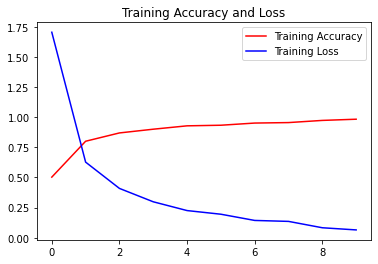

<Figure size 432x288 with 0 Axes>

In [10]:
# plotting the obtained loss and accuracy for each epoch 
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [11]:
# evaluate the model performance using the test dataset
loss, acc = model.evaluate(test, verbose=2)
print("Loss on test data: {}".format(loss))
print("Accuracy on test data: {}".format(acc))

4/4 - 25s - loss: 0.2090 - accuracy: 0.9300
Loss on test data: 0.20896203815937042
Accuracy on test data: 0.9300000071525574
